In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


In [ ]:
diabetes =pd.read_csv('/content/drive/MyDrive/ML/diabetes.csv')

#data Preprocessing

In [ ]:
# Handle missing data
diabetes = diabetes.dropna()

In [ ]:
# Separate the predictor variables and target variable
# Preprocessing the data
X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#ALgorithm

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
# Create a dictionary of regressors
regressors = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
}


#Train Data

In [ ]:
# Fit and evaluate each regressor
for name, regressor in regressors.items():
    print("Fitting", name)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("MSE:", mse)



Fitting Linear Regression
MSE: 2900.193628493482
Fitting Decision Tree Regression
MSE: 5219.988764044944
Fitting Random Forest Regression
MSE: 3038.8878292134837
Fitting Gradient Boosting Regression
MSE: 2891.7742662294463
Fitting Support Vector Regression
MSE: 5033.019856370607


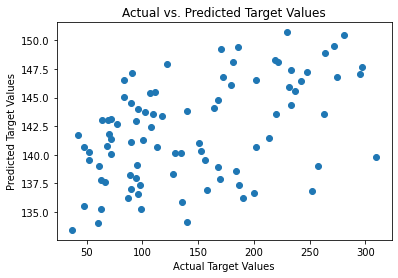

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of the actual vs. predicted target values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs. Predicted Target Values')
plt.show()

#cross validatioon for evaluaion

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Create a random forest regression model
rf = RandomForestRegressor()
from sklearn.metrics import mean_squared_error, r2_score
# Perform grid search cross-validation to find the optimal hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
# Print out the best hyperparameters and the corresponding model performance on the test set
print("Best parameters: ", grid_search.best_params_)
y_pred = grid_search.predict(X_test_scaled)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, y_pred))

Best parameters:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Mean squared error: 2785.05
Coefficient of determination (R^2): 0.47


To tune the hyperparameters of a regression model on the diabetes dataset, we can use grid search cross-validation. 